In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")


In [ ]:
hu = os.listdir(path)
file_path = os.path.join(path, 'Housing.csv')


In [ ]:
house = pd.read_csv(file_path)

In [ ]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
house.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
house.duplicated().sum()

0

In [ ]:
house.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

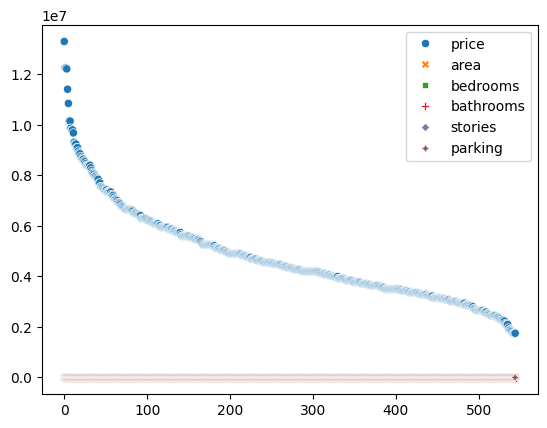

In [ ]:
sns.scatterplot(house)

<Axes: >

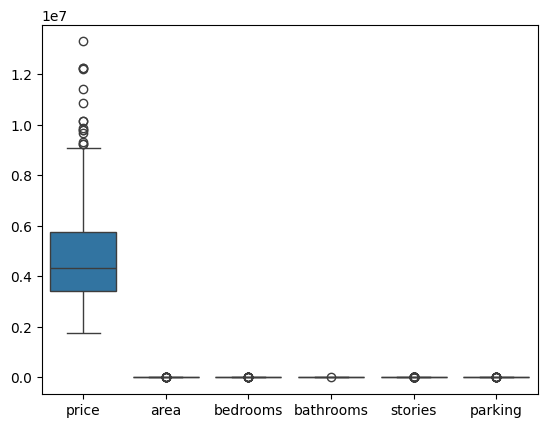

In [ ]:
sns.boxplot(house)

<ipython-input-13-4796f4f78167>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['area'])


<Axes: xlabel='area', ylabel='Density'>

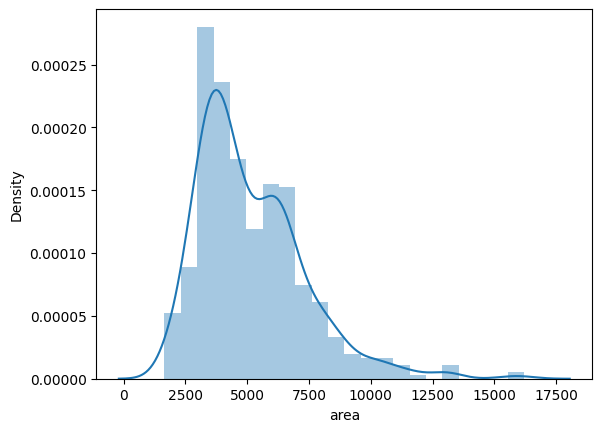

In [ ]:
sns.distplot(house['area'])

In [ ]:
#q1 = house['price'].quantile(0.25)
#q3 = house['price'].quantile(0.75)
#IQR=q3-q1

In [ ]:
#lower = q1-1.5*IQR
#upper = q3-1.5*IQR
#h = house[(house['price']>=lower) & (house['price']<upper)]

In [ ]:
from scipy import stats

(539, 13)

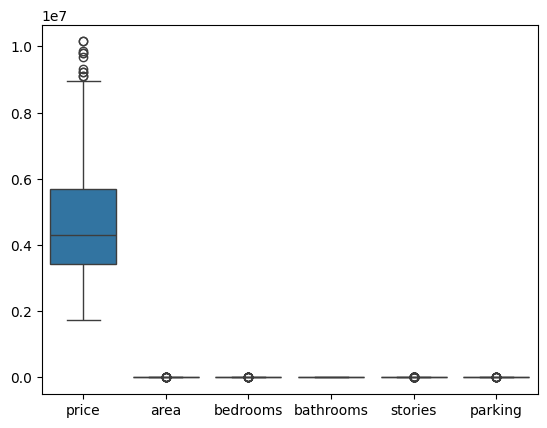

In [ ]:
z = stats.zscore(house['price'])
the = 3
home = house[abs(z)<=the]
sns.boxplot(home)
home.shape

In [ ]:
home.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished


In [ ]:
home.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
home.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 6 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             539 non-null    int64 
 1   area              539 non-null    int64 
 2   bedrooms          539 non-null    int64 
 3   bathrooms         539 non-null    int64 
 4   stories           539 non-null    int64 
 5   mainroad          539 non-null    object
 6   guestroom         539 non-null    object
 7   basement          539 non-null    object
 8   hotwaterheating   539 non-null    object
 9   airconditioning   539 non-null    object
 10  parking           539 non-null    int64 
 11  prefarea          539 non-null    object
 12  furnishingstatus  539 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.0+ KB


In [ ]:
home.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539,539,539,539,539,539.000000,539,539
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,462,443,352,514,372,NaN,415,225
mean,4.685700e+06,5117.411874,2.957328,1.274583,1.799629,NaN,NaN,NaN,NaN,NaN,0.675325,NaN,NaN
std,1.712754e+06,2156.687235,0.736740,0.482716,0.864801,NaN,NaN,NaN,NaN,NaN,0.847237,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.319000e+06,4510.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.696250e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


<ipython-input-23-297e269e439e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home['price'])


<Axes: xlabel='price', ylabel='Density'>

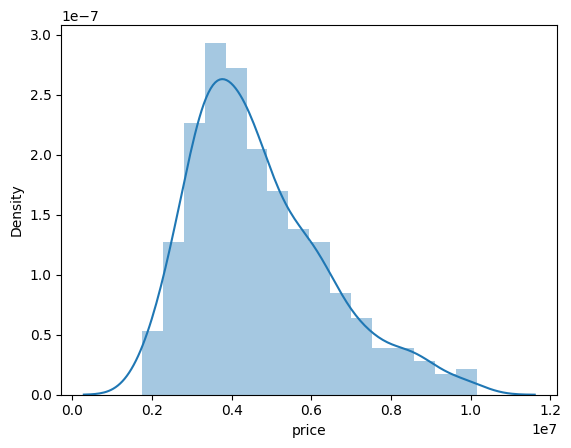

In [ ]:
sns.distplot(home['price'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
  scaler = StandardScaler()
  home[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]=scaler.fit_transform(home[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

<ipython-input-25-d03839de1c2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]=scaler.fit_transform(home[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])


In [ ]:
home

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,3.193322,1.607004,1.416566,3.577717,2.546730,yes,no,no,no,yes,1.564977,yes,semi-furnished
7,3.193322,5.143483,2.775158,3.577717,0.231911,yes,no,no,no,no,-0.797831,no,unfurnished
8,3.029690,1.384234,1.416566,-0.569357,0.231911,yes,yes,yes,no,yes,1.564977,yes,furnished
9,2.988783,0.293587,0.057973,1.504180,2.546730,yes,yes,no,no,yes,0.383573,yes,unfurnished
10,2.988783,3.751168,0.057973,-0.569357,0.231911,yes,no,yes,no,yes,1.564977,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.674707,-0.982701,-1.300619,-0.569357,-0.925498,yes,no,yes,no,no,1.564977,no,unfurnished
541,-1.705593,-1.261164,0.057973,-0.569357,-0.925498,no,no,no,no,no,-0.797831,no,semi-furnished
542,-1.715615,-0.694956,-1.300619,-0.569357,-0.925498,yes,no,no,no,no,-0.797831,no,unfurnished
543,-1.715615,-1.024470,0.057973,-0.569357,-0.925498,no,no,no,no,no,-0.797831,no,furnished


In [ ]:
home[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
6,yes,no,no,no,yes,yes,semi-furnished
7,yes,no,no,no,no,no,unfurnished
8,yes,yes,yes,no,yes,yes,furnished
9,yes,yes,no,no,yes,yes,unfurnished
10,yes,no,yes,no,yes,yes,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [ ]:

from sklearn.preprocessing import OneHotEncoder
home = pd.get_dummies(home,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus'],drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
encoder = LabelEncoder()

# List of binary categorical columns
binary_columns = [ 'prefarea']

# Apply LabelEncoder to these binary columns
for column in binary_columns:
    home[column] = encoder.fit_transform(home[column])

# Check the transformed DataFrame
print(home.head())


       price      area  bedrooms  bathrooms   stories   parking  prefarea  \
6   3.193322  1.607004  1.416566   3.577717  2.546730  1.564977         1   
7   3.193322  5.143483  2.775158   3.577717  0.231911 -0.797831         0   
8   3.029690  1.384234  1.416566  -0.569357  0.231911  1.564977         1   
9   2.988783  0.293587  0.057973   1.504180  2.546730  0.383573         1   
10  2.988783  3.751168  0.057973  -0.569357  0.231911  1.564977         1   

    mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
6           True          False         False                False   
7           True          False         False                False   
8           True           True          True                False   
9           True           True         False                False   
10          True          False          True                False   

    airconditioning_yes  furnishingstatus_semi-furnished  \
6                  True                             True

In [ ]:
from sklearn.model_selection import train_test_split
X = home.drop('price',axis=1)
y = home['price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((431, 13), (108, 13), (431,), (108,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_,y_pred)

[ 0.2801984   0.03205609  0.26053081  0.21288889  0.08449019  0.34293504
  0.24727738  0.24886651  0.14214871  0.418961    0.47318454 -0.05344602
 -0.21591958] [-6.82552226e-01  1.23571132e+00 -2.71319255e-02  1.32606122e+00
 -7.66235316e-01  1.17979841e+00 -8.55067037e-01 -8.11418563e-01
  8.85954193e-01 -1.03371118e+00  1.24482522e+00 -3.33408373e-01
  9.75704317e-03  6.68882089e-01  1.96202439e-01 -2.57465624e-01
 -5.23352905e-01  2.97221543e-01 -1.20541540e-01  3.31164480e-01
 -1.06913721e+00 -7.25101644e-01 -2.33450529e-01 -4.03809187e-01
  8.81675880e-02  1.45044743e+00 -2.75433676e-01 -5.70204434e-01
  1.47986894e+00 -9.47561191e-01  4.82466500e-01 -2.75777521e-01
 -7.28959879e-01 -8.51538924e-02 -1.08455738e+00 -1.08702816e+00
 -2.32920026e-01  8.48397234e-01 -8.79202159e-01 -4.85615458e-01
  7.18583037e-01 -8.16491186e-01 -9.41381767e-01 -1.10355287e-01
 -2.96078493e-01  1.27943802e+00  2.63137079e-01 -3.76451077e-01
  2.79909631e-01  1.56809475e+00 -1.05869594e+00 -6.96945492

In [ ]:
home

,price,area,bedrooms,bathrooms,stories,parking,prefarea,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
6,3.193322,1.607004,1.416566,3.577717,2.546730,1.564977,1,True,False,False,False,True,True,False
7,3.193322,5.143483,2.775158,3.577717,0.231911,-0.797831,0,True,False,False,False,False,False,True
8,3.029690,1.384234,1.416566,-0.569357,0.231911,1.564977,1,True,True,True,False,True,False,False
9,2.988783,0.293587,0.057973,1.504180,2.546730,0.383573,1,True,True,False,False,True,False,True
10,2.988783,3.751168,0.057973,-0.569357,0.231911,1.564977,1,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.674707,-0.982701,-1.300619,-0.569357,-0.925498,1.564977,0,True,False,True,False,False,False,True
541,-1.705593,-1.261164,0.057973,-0.569357,-0.925498,-0.797831,0,False,False,False,False,False,True,False
542,-1.715615,-0.694956,-1.300619,-0.569357,-0.925498,-0.797831,0,True,False,False,False,False,False,True
543,-1.715615,-1.024470,0.057973,-0.569357,-0.925498,-0.797831,0,False,False,False,False,False,False,False


In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [ ]:
mse,r2

(0.36206008905555553, 0.7235437704537405)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)

model_pred = dt_model.predict(X_test)
msed = mean_squared_error(y_test,model_pred)
r2d = r2_score(y_test,model_pred)
msed,r2

(0.81433592013902, 0.7235437704537405)

deep learing model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
dl_model = Sequential()
dl_model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))

dl_model.add(Dense(64,activation = 'relu'))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(32,activation = 'relu'))
dl_model.add(Dropout(0.2))

dl_model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
dl_model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.9308
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6280
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4893 
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4401
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4054 
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3708
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3894
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3061
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3357
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3253
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3068
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3120
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3158
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3036  
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2300 
Epoch 

In [ ]:
dl_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,509 (84.02 KB)

 Trainable params: 7,169 (28.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,340 (56.02 KB)

In [ ]:
dl_y_pred = dl_model.predict(X_test)
msedl = mean_squared_error(y_test,dl_y_pred)
r2dl = r2_score(y_test,dl_y_pred)
msedl,r2dl

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(0.3682129724131642, 0.7188456471717197)